# Data visualisation task 

**Additional information**  
[Cars93 metadata](https://jse.amstat.org/v1n1/datasets.lock.html) 

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
cars_df = pd.read_csv('Cars93.csv')

# Explore data
cars_df.columns

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [3]:
# Explore data
cars_df.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
# Explore data
cars_df.isnull().sum()

Unnamed: 0             0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags               34
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

### 1. Boxplot

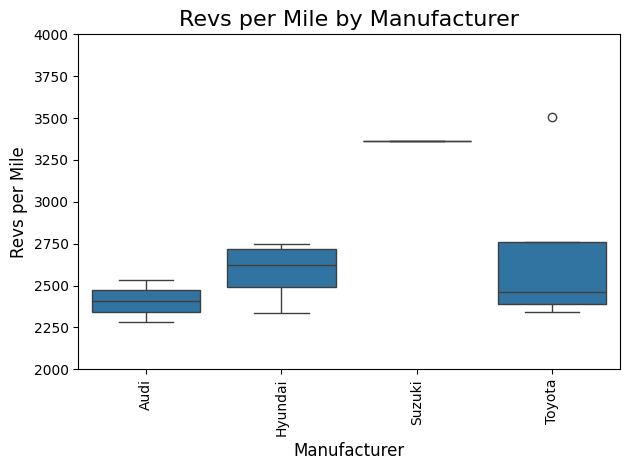

In [5]:
# Filtering selected manufacturers
selected_manufacturers = ['Audi', 'Hyundai', 'Suzuki', 'Toyota']
filtered_cars_df = cars_df[cars_df['Manufacturer'].isin(selected_manufacturers)]

# Boxplot for revs per mile
plt.figure()
sns.boxplot(data = filtered_cars_df, x ='Manufacturer', y="Rev.per.mile")
plt.ylim(2000, 4000)
plt.title("Revs per Mile by Manufacturer", fontsize = 16)
plt.xlabel("Manufacturer", fontsize = 12)
plt.ylabel("Revs per Mile", fontsize = 12)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Boxplot question:**  
Which of these manufacturers has the car with the highest revs per mile?


**Boxplot answer:**  
From the boxplot, it can be seen  that "Toyota" has the highest revs per mile due to an outlier (shown at the top). However, "Suzuki" has the highest median revs per mile, meaning that on average, Suzuki cars require more revs per mile compared to other manufacturers.


### 2. Histogram

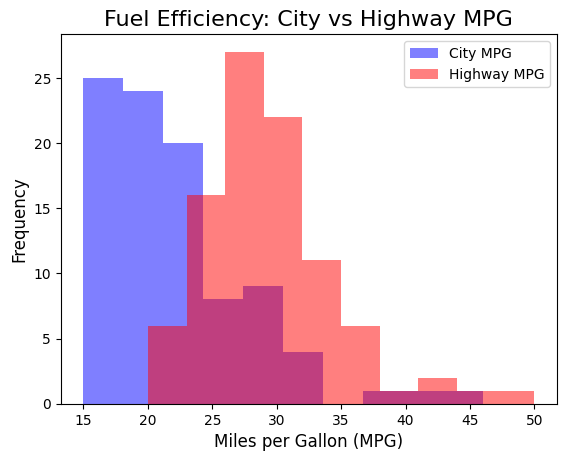

In [6]:
# Histogram of MPG
plt.figure()
plt.hist(cars_df["MPG.city"], label='City MPG', alpha = 0.5,  color='blue')
plt.hist(cars_df["MPG.highway"], label='Highway MPG', alpha = 0.5, color='red')

plt.title('Fuel Efficiency: City vs Highway MPG', fontsize=16)
plt.xlabel('Miles per Gallon (MPG)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.legend()
plt.show()

**Histogram question:**  
Is it generally more fuel efficient to drive in the city or on the highway?

**Histogram answer:**  
From the histograms, it can be seen that highway driving generally yields higher fuel efficiency compared to city driving. The distribution of highway MPG shows more cars achieving higher MPG values compared to city MPG.

This suggests that, on average, cars are more fuel-efficient on the highway than in the city.

### 3. Lineplot

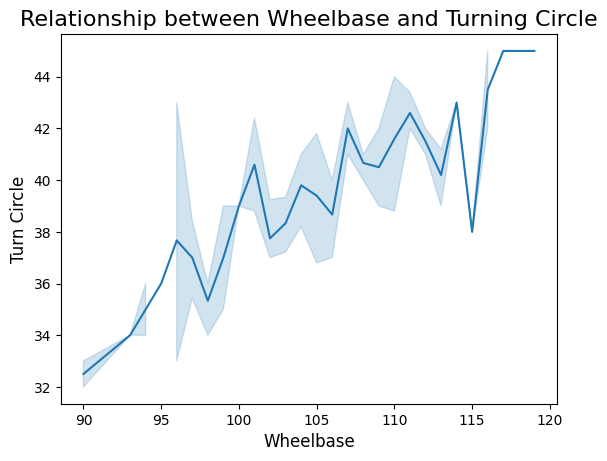

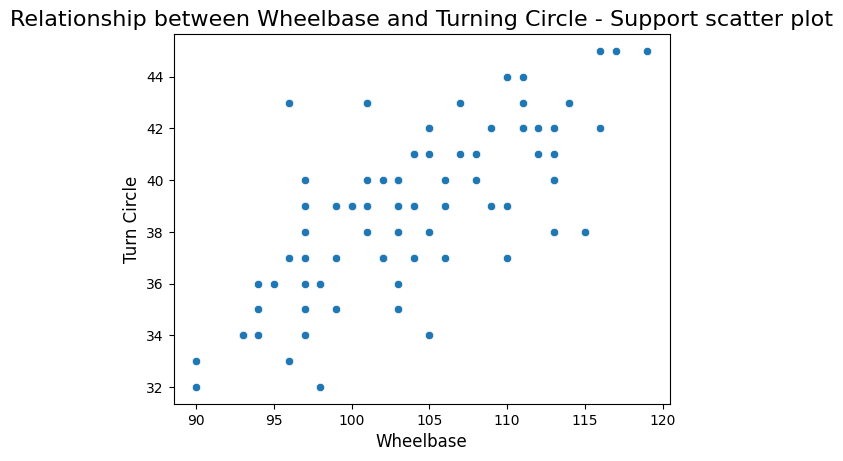

In [7]:
# Lineplot (Wheelbase vs turning circle)
plt.figure()
sns.lineplot(data = cars_df, x= 'Wheelbase', y ='Turn.circle')

plt.title('Relationship between Wheelbase and Turning Circle', fontsize=16)
plt.xlabel('Wheelbase', fontsize=12)
plt.ylabel('Turn Circle', fontsize=12)

plt.show()

# Adding a scatter plot following Kaylen suggestion
# Scatter plot for Wheelbase vs Turning Circle
plt.figure()
sns.scatterplot(data=cars_df, x='Wheelbase', y='Turn.circle')
plt.title('Relationship between Wheelbase and Turning Circle - Support scatter plot', fontsize=16)
plt.xlabel('Wheelbase', fontsize=12)
plt.ylabel('Turn Circle', fontsize=12)
plt.show()

**Lineplot question:**  
What is this relationship? What happens when the wheelbase gets larger?


**Lineplot answer:**  
The line plot shows that there is a positive correlation between wheelbase and turning circle.

As the wheelbase increases, the turning circle increases. This suggests that larger cars (with a larger wheelbase) require more space to complete a turn.


### 4. Barplot

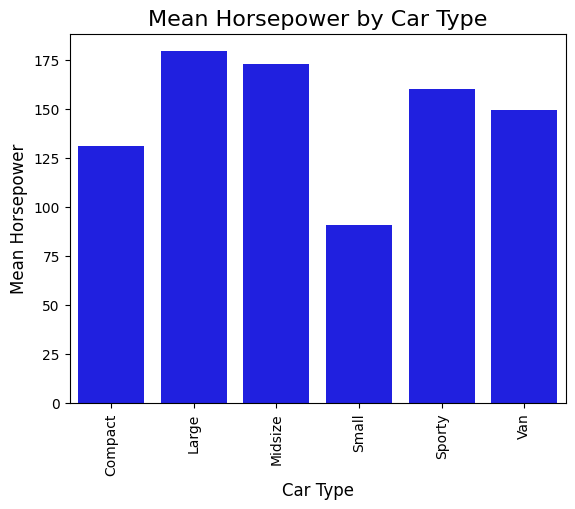

In [8]:
# Barplot for mean horsepower

# Grouping the data by wheelbase and calculating the mean horsepower for each wheelbase size
mean_hp_by_type = cars_df.groupby('Type')['Horsepower'].mean()

# Create a DataFrame using the result of the groupby and mean calculation
mean_hp_by_wheelbase_df = pd.DataFrame({
    'Type': mean_hp_by_type.index,
    'Horsepower': mean_hp_by_type.values
})

# Create a barplot to visualize the mean horsepower by wheelbase size
plt.figure()
sns.barplot(data=mean_hp_by_wheelbase_df, x='Type', y='Horsepower', color='blue')

plt.title('Mean Horsepower by Car Type', fontsize=16)
plt.xlabel('Car Type', fontsize=12)
plt.ylabel('Mean Horsepower', fontsize=12)

plt.xticks(rotation=90)
plt.show()

**Barplot question:**  
Does a larger car mean more horsepower?



**Barplot answer:**  
The bar chart shows that “Large” cars do tend to have the highest average horsepower. However, "Sporty" cars also have fairly high horsepower despite not necessarily being large in size. Meanwhile, "Small" cars sit at the lower end of the horsepower scale.

This indicates that while larger cars often come with more powerful engines, size alone does not determine horsepower. Other factors, such as engine design and  performance goals can play a significant role in determining a car’s horsepower.